# Item (a)

Tempo de vida esperado para Mulheres: [0.1287349  0.12245643 0.11648416 0.11080316 0.10539922 0.10025884
 0.09536916 0.09071795 0.08629359 0.082085  ]
Tempo de vida esperado para Homens: [0.08629359 0.082085   0.07808167 0.07427358 0.07065121 0.06720551
 0.06392786 0.06081006 0.05784432 0.05502322]


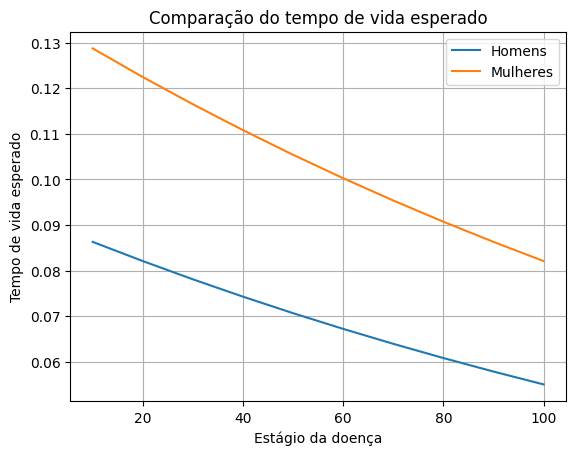

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def plot_expected_value(p_params: list, p_interval: tuple, p_size: int):
    stage = np.linspace(p_interval[0], p_interval[1], p_size)
    gender_female = np.zeros(p_size)
    gender_male = np.ones(p_size)
    female = (np.exp(p_params[0])) * ((np.exp(p_params[1])) ** gender_female) * ((np.exp(p_params[2])) ** stage)
    male = (np.exp(p_params[0])) * ((np.exp(p_params[1])) ** gender_male) * ((np.exp(p_params[2])) ** stage)

    print(f"Tempo de vida esperado para Mulheres: {female}")
    print(f"Tempo de vida esperado para Homens: {male}")

    plt.figure()
    plt.title("Comparação do tempo de vida esperado")
    plt.plot(stage, male, label="Homens")
    plt.plot(stage, female, label="Mulheres")
    plt.xlabel("Estágio da doença")
    plt.ylabel("Tempo de vida esperado")
    plt.legend()
    plt.grid()
    plt.show()

plot_expected_value([-2.0, -0.4, -0.005], (10, 100), 10)

# Item (b)

Falso, se for somado $b_1 = e^{-\beta_1}$ não irá corresponder com o valor do tempo de vida esperado para as mulheres

Tempo de vida esperado para Mulher: 0.1287349

Tempo de vida calculado para Homem: 0.1287349 + $e^{-(-0.4)}$ = 1.619

Tempo de vida esperado para Homens: 0.08629359

# Item (c)

Verdadeiro, o fato de ser homem de fato reduz o tempo de vida esperado dos pacientes:

Tempo de vida esperado para Mulher: 0.1287349

Tempo de vida calculado para Homem: 0.1287349 * $e^{-0.20}$ = 0.105

Redução do tempo de vida 18.13%

# Item (d)

Verdadeiro, dado que $Y_1$ é um indivíduo do sexo masculino e $Y_2$ do sexo feminino, o tempo de vida esperado para os pacientes do sexo masculino será de $E(Y_1) = e^{\beta_1} * E(Y_2)$. Afinal, como o atributo de gênero para pacientes do sexo feminino é zero, cancela a contribuição do coeficiente $\beta_1$. Essa correspondência só é verdade se for considerado que ambos indivíduos se encontram no mesmo estágio da doença, ou seja, $x_{i2}$ é igual para ambos.

# Item (e)

Verdadeiro, dado dois indivíduos do sexo masculino $Y_i$ e $Y_j$, com $x_{i2} = 50$ e $x_{j2} = 50 + x$, pode-se dizer que $E(Y_i) = {e^{\beta_2}}^x * E(Y_j)$. Afinal, o estágio da doença afeta exponencialmente o tempo de vida esperado dos pacientes de acordo com as fórmulas dadas, aumentado x no $x_{i2}$ corresponde ao multiplicar o tempo de vida esperado por ${e^{\beta_2}}^x$. Por exemplo:

Tempo de vida esperado para Homens: 0.08629359

0.08629359 * ${e^{-0.005}}^{10}$ = 0.082085. Que corresponde com o valor mostrado no gráfico do item (a)

# Item (f)

Falso, ao variar o $x_{2}$, o tempo de vida é afetado exponencialmente da mesma forma em indivíduos de gêneros diferentes. O atributo sexo insere uma natural redução no tempo de vida esperado para indivíduos do sexo masculino, mas a forma que o estágio da doença progride afeta da mesma forma em ambos. Nas fórmulas fornecidas fica evidente, afinal a contribuição do coeficiente $\beta_2$ é a mesma. No gráfico do item (a) pode-se notar que a curvatura de ambas as curvas são iguais também.

In [3]:
from dataclasses import dataclass
import numpy as np
from tqdm import tqdm


@dataclass
class ExpMLE:
    params: np.ndarray
    X: np.ndarray
    Y: np.ndarray
    lambda_array: np.ndarray

    def check_converged(self, p_grad_matrix):
        return not np.any(np.round(p_grad_matrix, 7))

    def update_lambda(self):
        self.lambda_array = np.exp(self.X @ self.params)

    def update_params(self, p_hessian_matrix, p_grad_matrix):
        self.params = self.params - (np.linalg.inv(p_hessian_matrix) @ p_grad_matrix)

    def get_hessian_matrix(self):
        return -self.X.T @ ((self.Y * self.lambda_array) * self.X)

    def get_grad_matrix(self):
        return self.X.T @ (1 - self.Y * self.lambda_array)

    def newton_raphson(self, max_iter=100):
        for iter in tqdm(range(max_iter)):
            grad_matrix = self.get_grad_matrix()
            hessian_matrix = self.get_hessian_matrix()

            self.update_params(hessian_matrix, grad_matrix)
            self.update_lambda()

            if self.check_converged(grad_matrix):
                print(f"Convered in {iter} steps")
                break

        print(f"Theta matrix: {self.params.T}")


y = np.array([3.19, 16.87, 24.65, 2.04, 5.73, 1.03, 6.02, 42.41, 36.08, 7.34, 24.88, 5.90])[:, np.newaxis]
x1 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
x2 = [11, 67, 92, 32, 85, 36, 20, 69, 58, 47, 100, 72]
x = np.stack([np.ones_like(x1), x1, x2], axis=1)

lambda_array = (1 / np.mean(y)) * np.ones_like(y)
init_params = np.array([-np.log(np.mean(y)), 0, 0])[:, np.newaxis]

mle = ExpMLE(init_params, x, y, lambda_array)
mle.newton_raphson(max_iter=10)

 60%|██████    | 6/10 [00:00<00:00, 3000.22it/s]

Convered in 6 steps
Theta matrix: [[-0.61359248 -0.62872241 -0.02578151]]
